In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
df["year_start"]=ss.fit_transform(df["year_start"].array.reshape(-1,1))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/sample_data/data.csv")

In [ ]:
le=LabelEncoder()

In [ ]:
df["sports"]=le.fit_transform(df["sports"])

In [ ]:
df.head()

,Unnamed: 0,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,0,Aaron Peavy,Female,41,165.0,England,82,15,3,7,8,7,Fight Zone Wrestling,-2.868861,42
1,1,Abe Rutland,Male,36,185.0,Japan,100,16,0,8,5,9,World Wrestling Entertainment,-0.178809,161
2,2,Adrian Quinn,Male,29,178.5,Japan,93,24,4,8,8,7,World Wrestling Entertainment,0.770621,153
3,3,Alan Beckham,Male,39,187.5,Japan,107,16,3,7,6,8,Fight Zone Wrestling,-0.653524,252
4,4,Albertha Rodriguez,Female,29,158.0,USA,72,30,1,5,7,7,Consejo Global de Lucha Libre,0.770621,360


In [ ]:
df.isna().sum()

name             0
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
federation       0
year_start       0
rank             0
dtype: int64

In [ ]:
df["nationality"].unique()

array([3, 6, 7, 4, 2, 1, 0, 5])

In [ ]:
df=df.drop("Unnamed: 0",axis=1)

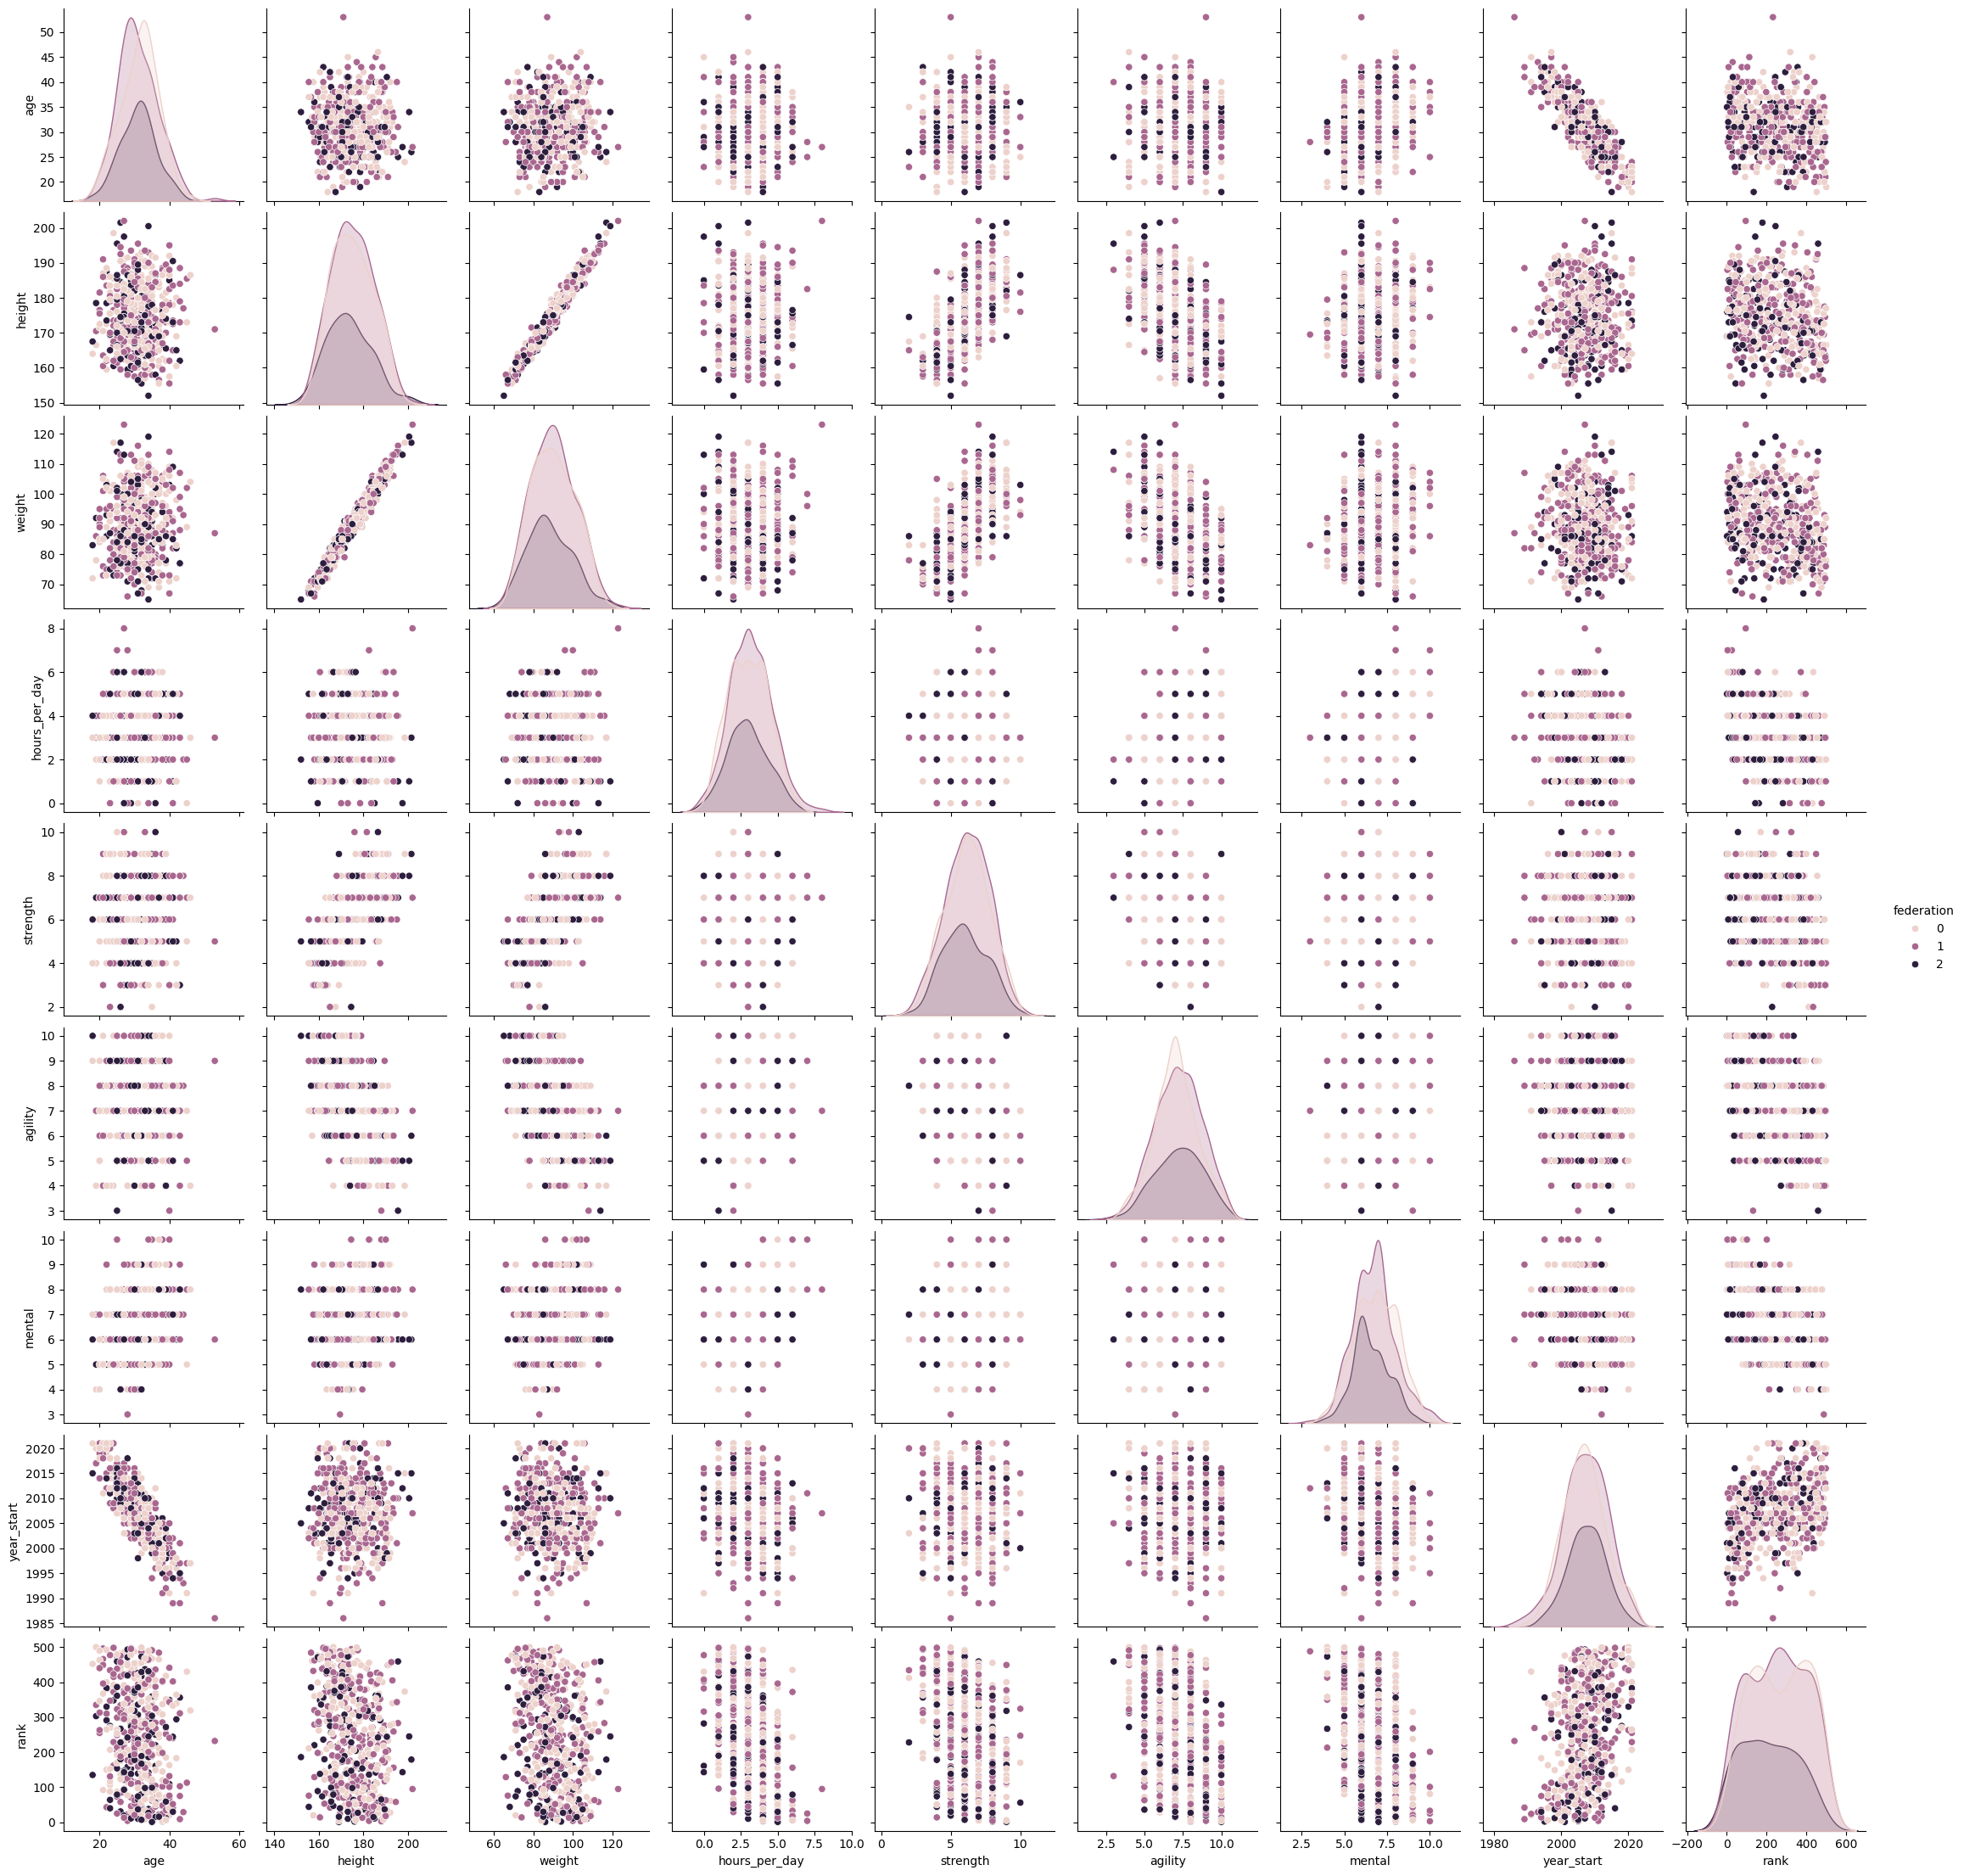

In [ ]:
sns.pairplot(df, hue="federation")

<ipython-input-12-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

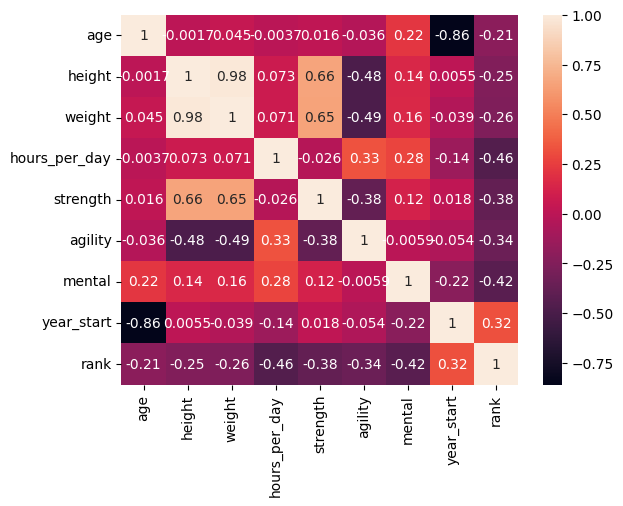

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
corr

,Unnamed: 0,age,height,weight,sports,hours_per_day,strength,agility,mental,year_start,rank
Unnamed: 0,1.000000,-0.011577,-0.008069,-0.036920,0.035021,-0.061164,0.044723,-0.018231,-0.045365,0.049089,-0.002339
age,-0.011577,1.000000,-0.001694,0.044624,0.053688,-0.003731,0.016052,-0.036051,0.219514,-0.858723,-0.208136
height,-0.008069,-0.001694,1.000000,0.982154,-0.108008,0.072840,0.658785,-0.484157,0.144129,0.005482,-0.251894
weight,-0.036920,0.044624,0.982154,1.000000,-0.100731,0.071260,0.654799,-0.486668,0.157628,-0.039413,-0.257785
sports,0.035021,0.053688,-0.108008,-0.100731,1.000000,-0.241658,-0.045680,-0.101379,-0.077690,0.028174,-0.029908
hours_per_day,-0.061164,-0.003731,0.072840,0.071260,-0.241658,1.000000,-0.025897,0.326623,0.275585,-0.136393,-0.458479
strength,0.044723,0.016052,0.658785,0.654799,-0.045680,-0.025897,1.000000,-0.384900,0.116703,0.017604,-0.383859
agility,-0.018231,-0.036051,-0.484157,-0.486668,-0.101379,0.326623,-0.384900,1.000000,-0.005940,-0.054115,-0.343249
mental,-0.045365,0.219514,0.144129,0.157628,-0.077690,0.275585,0.116703,-0.005940,1.000000,-0.218854,-0.423994
year_start,0.049089,-0.858723,0.005482,-0.039413,0.028174,-0.136393,0.017604,-0.054115,-0.218854,1.000000,0.323980


In [ ]:
corr=df.corr()

<ipython-input-96-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [ ]:
features=list(corr[(abs(corr["rank"])>0.3)].index)[:5]

In [ ]:
x=df[features]
x

,hours_per_day,strength,agility,mental,year_start
0,3,7,8,7,-2.868861
1,0,8,5,9,-0.178809
2,4,8,8,7,0.770621
3,3,7,6,8,-0.653524
4,1,5,7,7,0.770621
...,...,...,...,...,...
495,2,9,6,5,0.137667
496,5,4,9,6,-0.653524
497,3,8,8,7,2.194766
498,2,5,5,5,0.770621


In [ ]:
y=df["rank"]
y

0       42
1      161
2      153
3      252
4      360
      ... 
495    353
496     74
497    265
498    499
499     92
Name: rank, Length: 500, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [ ]:
gb=GradientBoostingRegressor()


In [ ]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred=gb.predict(x_test)

In [ ]:
print("Mean Squared Error:",mean_squared_error(y_pred,y_test))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("R Squared:",r2_score(y_pred,y_test))

Mean Squared Error: 6737.562592820871
Root Mean Squared Error: 82.082657077003
R Squared: 0.48101423241405583


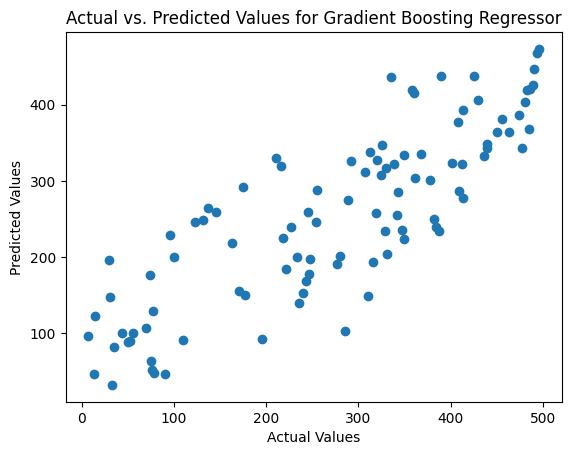

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Gradient Boosting Regressor")
plt.show()


XGBRegressor

In [ ]:
xgb=XGBRegressor()

In [ ]:
xgb.fit(x_train,y_train)

In [ ]:
y1_pred=xgb.predict(x_test)

In [ ]:
print("Mean Squared Error:",mean_squared_error(y1_pred,y_test))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y1_pred,y_test)))
print("R Squared:",r2_score(y1_pred,y_test))

Mean Squared Error: 9476.665422071452
Root Mean Squared Error: 97.34816599233625
R Squared: 0.4474786134827008


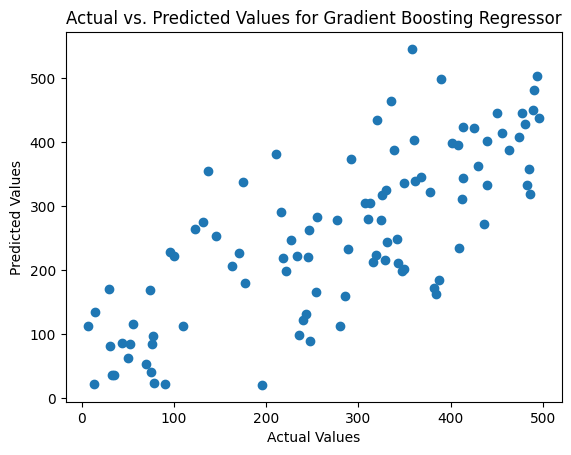

In [ ]:
plt.scatter(y_test, y1_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Gradient Boosting Regressor")
plt.show()

Random Forest


In [ ]:
rf=RandomForestRegressor(n_estimators=50)

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
y2_pred=rf.predict(x_test)

In [ ]:
print("Mean Squared Error:",mean_squared_error(y2_pred,y_test))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y2_pred,y_test)))
print("R Squared:",r2_score(y2_pred,y_test))

Mean Squared Error: 7196.367091524444
Root Mean Squared Error: 84.83140392286599
R Squared: 0.4199952328361777


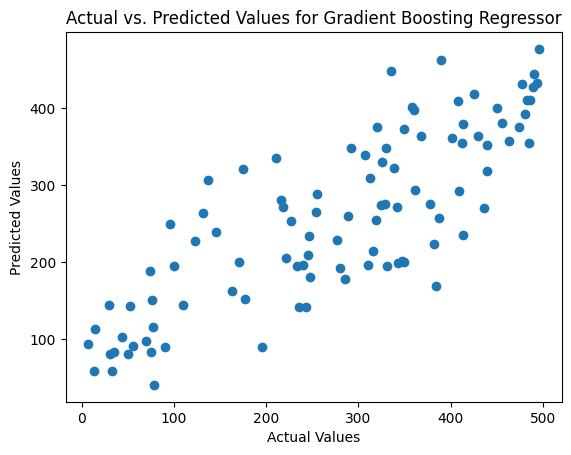

In [ ]:
plt.scatter(y_test, y2_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Gradient Boosting Regressor")
plt.show()

Conclusion: Upon trying different models, gradient boosting seems to give the best accuracy. and the output graph of actual vs predicted also seems to be less varied in the gradient boosting model
